In [156]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
d1 = pd.read_csv('Regression_technique_for_TurboEngine_RUL-main\RUL_Train_001.csv')

In [158]:
d1.shape

(20631, 26)

In [159]:
d1.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [161]:
X = d1.iloc[:,0:-1]
Y = d1['RUL']

In [162]:
X

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [163]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

In [164]:
regressor = RandomForestRegressor()

In [165]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [166]:
X_train['Cycle'].describe()

count    16504.000000
mean       105.444559
std         65.917461
min          1.000000
25%         51.000000
50%        101.000000
75%        153.000000
max        362.000000
Name: Cycle, dtype: float64

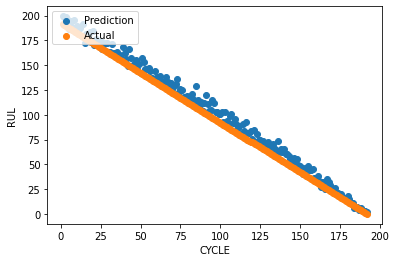

In [167]:
train_pred = regressor.predict(X_train)

plt.scatter(X_train['Cycle'][0:192],train_pred[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(Y_train)[0:192])

plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction','Actual'],loc='upper left')
plt.show()

In [177]:
from sklearn import metrics
print("RMSE on Training Set: ", np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))

RMSE on Training Set:  12.102990553249256


In [172]:
test_pred = regressor.predict(X_test)

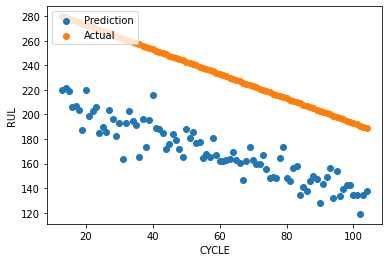

In [175]:
plt.scatter(X_test['Cycle'][100:192],test_pred[100:192])
plt.scatter(X_test['Cycle'][100:192],np.array(Y_test)[100:192])

plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction','Actual'],loc='upper left')
plt.show()

In [178]:
from sklearn import metrics
print("RMSE on Test Set: ", np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))

RMSE on Test Set:  49.30654946196219
